In [1]:
import numpy as np
from utilities.Dataset import *
import pickle
import sys
from typing import List
import torch
import os

In [2]:
participant_data_path = './EEG/number'
processed_data_path = './EEG/processed_data'
split_data_path = './EEG/split_data'

In [3]:
ps = os.listdir(participant_data_path)
participants=[]
for p in ps:
    p= p[:3]
    if p not in participants:
        participants.append(p)
        
participants= sorted(participants)
# participants, len(participants)

In [4]:
load_name=f"userfold_data_scaled_p_dictionary-number"
data_dir = "./EEG/split_data/standard_scaled"
try:
    raw_user_fold= pickle.load(open(os.path.join(data_dir, f"{load_name}.pkl"), "rb"))
except:
    print(f"pickle file does not exist. Use EEG-Preprocess.ipynb and EEG-Split.ipynb to save data setting.")
    sys.exit()

In [4]:
input_dim=(32,188)

In [5]:
start=-0.5
step=1.5/(188-1)
timestep_labels=[]
for i in range(input_dim[1]):
    timestep_labels.append(round(start+step*i,3))
    
# timestep_labels

In [6]:
# channel_names=[i for i in range(input_dim[0])]
channel_names=["AFz","F3","F1","Fz","F2","F4","FC5","FC3","FC1","FCz","FC2",
               "FC4","FC6","C5","C3","C1","Cz","C2","C4","C6","CP5","CP3",
               "CP1","CPz","CP2","CP4","CP6","P3","P1","Pz","P2","P4"]

In [27]:
classifier="LSTM_EEGNet-Grad_Multivariate"#-DF_Multivariate"#"LSTM_EEGNet"

results={}
for p in range(len(participants)):
    results[p]= {"overall":[],"0":[],"1":[]}
    
for r in range(5):
    saved_dicts= f"./EEG/saved_models/Userfold/run{r}/participant_dictionary-{classifier}.pkl"
    dicts= pickle.load(open(saved_dicts,"rb"))
    
    for p in range(len(participants)):
        results[p]["overall"].append(dicts[p]["macro avg"]["f1-score"])
        results[p]["0"].append(dicts[p]["0"]["f1-score"])
        results[p]["1"].append(dicts[p]["1"]["f1-score"])
        
avg_overall=[]
avg_0=[]
avg_1=[]
for p in range(len(participants)):
    print(p+1)
    print("Overall: ", np.mean(results[p]["overall"]),", ",results[p]["overall"])
    print("0: ", np.mean(results[p]["0"]),", ",results[p]["0"])
    print("1: ", np.mean(results[p]["1"]),", ",results[p]["1"])
    print()

    avg_overall.append(np.mean(results[p]["overall"]))
    avg_0.append(np.mean(results[p]["0"]))
    avg_1.append(np.mean(results[p]["1"]))
    
print("avg overall", np.mean(avg_overall))
print("avg 0", np.mean(avg_0))
print("avg 1", np.mean(avg_1))

1
Overall:  0.6948549485610724 ,  [0.7072100984167737, 0.7735583684950774, 0.6779999999999999, 0.6136376938835235, 0.7018685820099881]
0:  0.8628838178927841 ,  [0.8617886178861789, 0.8888888888888891, 0.856, 0.8392156862745098, 0.8685258964143425]
1:  0.5268260792293612 ,  [0.5526315789473685, 0.6582278481012658, 0.5, 0.3880597014925373, 0.5352112676056339]

2
Overall:  0.5590928094271063 ,  [0.5703755703755704, 0.49275362318840576, 0.5934343434343434, 0.6062294911193292, 0.5326710190178825]
0:  0.819154497768297 ,  [0.803088803088803, 0.8188405797101449, 0.8257575757575757, 0.8288973384030419, 0.8191881918819188]
1:  0.2990311210859156 ,  [0.33766233766233766, 0.16666666666666669, 0.36111111111111105, 0.3835616438356165, 0.24615384615384617]

3
Overall:  0.5085404406286725 ,  [0.4896437448218724, 0.5185410334346505, 0.507870753935377, 0.5114951557999476, 0.5151515151515151]
0:  0.8106807201074033 ,  [0.8028169014084506, 0.8085106382978724, 0.8098591549295774, 0.8140350877192982, 0.81

In [28]:
# avg_overall, avg_0, avg_1
avg_1

[0.5268260792293612,
 0.2990311210859156,
 0.20640016114994167,
 0.2807686579987399,
 0.27859049458038554,
 0.12534499454483408,
 0.352828381266845,
 0.18965399795644422,
 0.3888575005241671,
 0.35560158805538256,
 0.22313296903460839,
 0.5642000196154016,
 0.36725563909774445,
 0.20740189266097545,
 0.24536164297587365,
 0.19319861809101196,
 0.370589782874457,
 0.24839425124056608,
 0.4706358136721113]

## EEGNet and LSTM_EEGNet

In [25]:
from scipy.stats import ttest_ind
# Overall F1
eegnet_f1=[0.6852245746851432,
  0.5005972463833837,
  0.5002190194965974,
  0.5116007402608176,
  0.4684351978544864,
  0.5030764205419531,
  0.5741006497233925,
  0.422991214032856,
  0.5712547656187975,
  0.5184098116255444,
  0.5323543458150007,
  0.7096315717744034,
  0.5812109771981997,
  0.4835158561109771,
  0.5114052466840067,
  0.4374578706262203,
  0.6136532137582243,
  0.482115710045279,
  0.5908894583981633]
# [0.686,0.5,0.529,0.507,0.468,0.485,0.574,0.423,0.56,0.51,0.541,0.71,0.581,0.487,0.503,0.437,0.607,0.479,0.574]
lstm_eegnet_f1=[0.6730610749057816,
  0.5676914050063442,
  0.5583428824772186,
  0.5539183818291502,
  0.5570273138106094,
  0.49265670379135224,
  0.5912680636916392,
  0.531548614484381,
  0.6481974127196765,
  0.6292014189282616,
  0.5315826865766706,
  0.7443218054847586,
  0.6146665127795232,
  0.5204130079256031,
  0.5266248336632947,
  0.5175320865471866,
  0.6076845511327695,
  0.5478581147771563,
  0.6781645353917989]

if 0.5< np.std(lstm_eegnet_f1)/ np.std(eegnet_f1) < 2:
    res= ttest_ind(lstm_eegnet_f1, eegnet_f1)
else:
    res= ttest_ind(lstm_eegnet_f1, eegnet_f1, equal_var=False)

print(res)

Ttest_indResult(statistic=2.0292922604943704, pvalue=0.049871832867404105)


In [26]:
from scipy.stats import ttest_ind
# Congruent F1
eegnet_f1=[0.8646525910364146,
  0.8217273252400071,
  0.8098130799794891,
  0.8229790107360447,
  0.8219689309708474,
  0.8382106488518252,
  0.8051510496671787,
  0.8072660354624872,
  0.8488363186619752,
  0.8259693089658366,
  0.834902166425632,
  0.8685026724631326,
  0.8313397846931118,
  0.8174455680793585,
  0.8291383321958519,
  0.8205293515493693,
  0.8343396015809809,
  0.8137700783632316,
  0.8450450838469392]
# [0.863,0.821,0.814,0.823,0.822,0.836,0.805,0.807,0.844,0.826,0.838,0.869,0.831,0.819,0.828,0.821,0.833,0.813,0.844]
lstm_eegnet_f1=[0.8522900501443338,
  0.8203094922782272,
  0.8083770587506744,
  0.820559385104786,
  0.8269756345006536,
  0.8156362343974667,
  0.8045898926381382,
  0.8092098240642273,
  0.8544329584774861,
  0.840786280628975,
  0.8226470157813441,
  0.8773940404725282,
  0.8330952470773653,
  0.8060310375964554,
  0.8089970513364104,
  0.8224211825233004,
  0.8297688801947286,
  0.8051829209311482,
  0.8561530395467377]

if 0.5< np.std(lstm_eegnet_f1)/ np.std(eegnet_f1) < 2:
    res= ttest_ind(lstm_eegnet_f1, eegnet_f1)
else:
    res= ttest_ind(lstm_eegnet_f1, eegnet_f1, equal_var=False)

print(res)

Ttest_indResult(statistic=-0.39436957084931434, pvalue=0.6956348373527776)


In [27]:
from scipy.stats import ttest_ind
# InCongruent F1
eegnet_f1=[0.5057965583338718,
  0.17946716752676015,
  0.19062495901370582,
  0.20022246978559038,
  0.11490146473812535,
  0.1679421922320812,
  0.3430502497796062,
  0.03871639260322497,
  0.29367321257561957,
  0.2108503142852523,
  0.22980652520436964,
  0.5507604710856743,
  0.3310821697032876,
  0.14958614414259577,
  0.19367216117216118,
  0.05438638970307123,
  0.3929668259354678,
  0.1504613417273264,
  0.33673383294938714]
# [0.509,0.179,0.244,0.19,0.115,0.134,0.343,0.039,0.275,0.194,0.243,0.551,0.331,0.156,0.177,0.054,0.38,0.145,0.305]
lstm_eegnet_f1=[0.4938320996672296,
  0.31507331773446107,
  0.3083087062037625,
  0.28727737855351404,
  0.2870789931205651,
  0.1696771731852377,
  0.37794623474514033,
  0.25388740490453504,
  0.44196186696186696,
  0.4176165572275483,
  0.24051835737199728,
  0.6112495704969891,
  0.39623777848168096,
  0.23479497825475057,
  0.24425261599017908,
  0.21264299057107278,
  0.38560022207081024,
  0.2905333086231644,
  0.5001760312368599]
if 0.5< np.std(lstm_eegnet_f1)/ np.std(eegnet_f1) < 2:
    res= ttest_ind(lstm_eegnet_f1, eegnet_f1)
else:
    res= ttest_ind(lstm_eegnet_f1, eegnet_f1, equal_var=False)

print(res)

Ttest_indResult(statistic=2.3384691950849787, pvalue=0.025034245594893905)


## Performance Comparison

In [32]:
from scipy.stats import ttest_ind

df_eeg_f1=[0.13941805321115663,
 0.09705257705257705,
 0.14782068712278085,
 0.06050515121302759,
 0.01553544494720965,
 0.08015873015873014,
 0.2269814389968449,
 0.013114754098360656,
 0.07069897315798955,
 0.08696929093797212,
 0.16836979969183358,
 0.3851821478687151,
 0.23510908506472633,
 0.08364543466375068,
 0.11609901485435703,
 0.02117794486215539,
 0.2236311995683892,
 0.0844665138782786,
 0.20453683116846272]
df_f1=[0.329481062097695,
 0.06986439733986567,
 0.14002344877344877,
 0.11929679990163862,
 0.0532656023222061,
 0.14802749040037175,
 0.22784037558685447,
 0.07810499609679937,
 0.14536497984773847,
 0.09673579109062981,
 0.14806294745991447,
 0.33079593750476627,
 0.2700065958088346,
 0.08997412733553597,
 0.13184949274198207,
 0.048768472906403945,
 0.3202923503078394,
 0.07547071683544349,
 0.18751071522367863]
nfs_eeg_f1=[0.4457371829826827,
 0.21789141414141416,
 0.22549034925705919,
 0.21716065500391663,
 0.29536712789909725,
 0.13183060073931036,
 0.3230166617045442,
 0.18908648975029868,
 0.3191393919000688,
 0.30297061922767005,
 0.3045641768240539,
 0.5662962631861256,
 0.42005678681852904,
 0.25600796833673545,
 0.23550288848796308,
 0.14275592759518183,
 0.39646828885050345,
 0.21103478024613506,
 0.3616855603156973]
nfs_f1=[0.5143243243243243,
 0.15175438596491228,
 0.22982259570494867,
 0.15952192734801432,
 0.1410129703486045,
 0.15118213889412307,
 0.30546194066947674,
 0.120301269629006,
 0.2849891265961599,
 0.21030000821795064,
 0.23685582404844702,
 0.5096897023605884,
 0.356537307441417,
 0.21081313184398112,
 0.2024441259223868,
 0.06018052238304892,
 0.37529028049575996,
 0.12093877454161642,
 0.31401209822262455]
grad_eeg_f1=[0.551633855812805,
 0.2559714249266488,
 0.25666361473114324,
 0.2656278720299671,
 0.30119659222188727,
 0.13719207748128773,
 0.36162125218277197,
 0.1815924426450742,
 0.33691584412152786,
 0.28841292041292044,
 0.2577242994427845,
 0.5307861541876056,
 0.3710417305726289,
 0.1721173165096292,
 0.20524828768541709,
 0.16434410490796,
 0.35240773137967263,
 0.25905570683145374,
 0.5406935006648063]
grad_f1=[0.5268260792293612,
 0.2990311210859156,
 0.20640016114994167,
 0.2807686579987399,
 0.27859049458038554,
 0.12534499454483408,
 0.352828381266845,
 0.18965399795644422,
 0.3888575005241671,
 0.35560158805538256,
 0.22313296903460839,
 0.5642000196154016,
 0.36725563909774445,
 0.20740189266097545,
 0.24536164297587365,
 0.19319861809101196,
 0.370589782874457,
 0.24839425124056608,
 0.4706358136721113]
w_eeg_f1=[0.5205513078470825,
 0.2838561587089013,
 0.21060658976483335,
 0.29546848329946923,
 0.3018241984865881,
 0.15507870698082044,
 0.37743416293440124,
 0.18989778794813117,
 0.42210212867170976,
 0.34560493723144325,
 0.24860414605263542,
 0.5945561313243808,
 0.3805056711273674,
 0.20435997271169234,
 0.23113537566490194,
 0.16707447812585385,
 0.37809882778547893,
 0.22961911499438026,
 0.5443031251754517]
w_f1=[0.5395514631707854,
 0.2926220619681194,
 0.2742809111230164,
 0.25931051349735634,
 0.3035072731470792,
 0.17030499675535365,
 0.37444658724358687,
 0.24154414058910093,
 0.3954548260728036,
 0.33466692426536926,
 0.26184621857952645,
 0.5371054161805805,
 0.381066625476264,
 0.24942748763801398,
 0.27626372374365643,
 0.22285447761194027,
 0.41712579282644063,
 0.2316098149431483,
 0.49687253499937895]
lstm_eegnet_f1=[0.4938320996672296,
  0.31507331773446107,
  0.3083087062037625,
  0.28727737855351404,
  0.2870789931205651,
  0.1696771731852377,
  0.37794623474514033,
  0.25388740490453504,
  0.44196186696186696,
  0.4176165572275483,
  0.24051835737199728,
  0.6112495704969891,
  0.39623777848168096,
  0.23479497825475057,
  0.24425261599017908,
  0.21264299057107278,
  0.38560022207081024,
  0.2905333086231644,
  0.5001760312368599]
if 0.5< np.std(lstm_eegnet_f1)/ np.std(nfs_eeg_f1) < 2:
    res= ttest_ind(lstm_eegnet_f1, nfs_eeg_f1)
else:
    res= ttest_ind(lstm_eegnet_f1, nfs_eeg_f1, equal_var=False)

print(res)

Ttest_indResult(statistic=1.3060043092665026, pvalue=0.19983491397113892)


In [33]:
# Holm Correction
# nfs_f1, nfs_eeg_f1, w_f1, w_eeg_f1,grad_f1, grad_eeg_f1
from statsmodels.stats.multitest import multipletests
multipletests([0.02001183027826729,0.19983491397113892,0.763217968063643,0.6111233079305656,0.4313714960972108,0.3651500919587298], alpha=0.05,method="holm")

(array([False, False, False, False, False, False]),
 array([0.12007098, 0.99917457, 1.        , 1.        , 1.        ,
        1.        ]),
 0.008512444610847103,
 0.008333333333333333)

### Element Multiplication

In [22]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from Models.AR_EEG_models import *

w_list=[]
n_epochs=300
for r in range(5):
    saved_dir= f"./EEG/saved_models/Userfold/run{r}"
    participants_w_list=[]
    for i in range(len(participants)):

        w= pickle.load(
            open(f"{saved_dir}/Userfold-{participants[i]}-LSTM_EEGNet-Weight_TS-w-e{n_epochs}.pkl", "rb") 
                        )  
        participants_w_list.append(w)
    
    avg_w= np.array(participants_w_list).mean(axis=0)
    w_list.append(avg_w)

grad_list=[]
for r in range(5):
    saved_dir= f"./EEG/saved_models/Userfold/run{r}"
    participant_grad={"AUC":[],"ROC":[],"STD":[]}
    for i in range(len(participants)):
        g= pickle.load(
                open(
                    os.path.join(
                        saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_TS-grad_all-e{n_epochs}.pkl"
                    ),"rb"
                )
        )

        participant_grad["AUC"].append(
            pd.DataFrame(
                Grad_AUC_with_grad(
                    g, n_epochs, np.zeros(input_dim[1]), x_shape=0
                ), index=np.arange(len(timestep_labels))
            ).to_numpy()
        ) 
        participant_grad["ROC"].append(
              pd.DataFrame(
                Grad_ROC_with_grad(
                    g, n_epochs, np.zeros(input_dim[1]), x_shape=0
                                   ), index=np.arange(len(timestep_labels))
              ).to_numpy()
        )
        participant_grad["STD"].append(
            pd.DataFrame(
                Grad_STD_with_grad(
                    g, n_epochs, np.zeros(input_dim[1]), x_shape=0
                                   ), index=np.arange(len(timestep_labels))
            ).to_numpy()
        )

    avg_grad={
        "Grad-AUC":np.array(participant_grad["AUC"]).mean(0),
        "Grad-ROC":np.array(participant_grad["ROC"]).mean(0),
        "Grad-STD":np.array(participant_grad["STD"]).mean(0)
    }
    grad_list.append(avg_grad)


ValueError: cannot reshape array of size 489600 into shape (300,newaxis,188)

In [23]:
np.array(g).shape

(15300, 32)

In [21]:
df_list=[]
for i, array in enumerate(w_list):
    ahp= array
    scaler= MinMaxScaler()
    ahp= scaler.fit_transform(ahp.reshape(-1,1)).reshape(-1)
    for j in range(len(timestep_labels)):
        df_list.append({
            "Methods":"Weight-Naive",
            "Timestep":timestep_labels[j],
            "Normalised Importance Estimate":ahp[j],
            "Run":i
        })
        
for i, dictionary in enumerate(grad_list):
    for method, hp in dictionary.items():
        ahp= hp.sum(0)
        scaler= MinMaxScaler()
        ahp= scaler.fit_transform(ahp.reshape(-1,1)).reshape(-1)
        for j in range(len(timestep_labels)):
            df_list.append({
                "Methods":method,
                "Timestep":timestep_labels[j],
                "Normalised Importance Estimate":ahp[j],
                "Run":i
            })    

IndexError: index 32 is out of bounds for axis 0 with size 32

In [19]:
array

array([1.0137364 , 1.0095364 , 0.9973966 , 1.0098492 , 1.0021743 ,
       0.99781436, 1.0217324 , 1.0121175 , 1.0160134 , 1.0235872 ,
       1.0244201 , 1.0144951 , 1.0208092 , 0.99852985, 1.0089287 ,
       1.0162328 , 1.0136123 , 1.0103269 , 1.0231333 , 1.0383874 ,
       1.0120755 , 1.0215254 , 0.99804056, 1.0188118 , 1.0165638 ,
       1.0132364 , 1.0751741 , 1.0235687 , 1.0171134 , 1.0065534 ,
       1.0353209 , 1.0411419 ], dtype=float32)

Text(0.5, 1.0, 'Relative Importance Estimate for Timesteps')

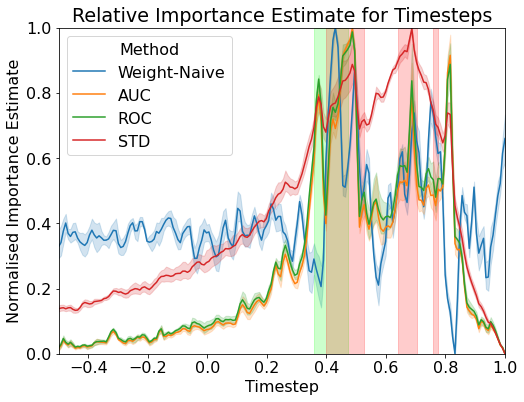

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(8,6))
matplotlib.rcParams.update({"font.size":16})
sns.lineplot(data=pd.DataFrame(df_list),
             x="Timestep",y="Normalised Importance Estimate", 
             hue="Methods")
plt.axvspan(0.358,0.471, color="lime", alpha=0.2)
plt.axvspan(0.398,0.527, color="red", alpha=0.2)
plt.axvspan(0.639,0.703, color="red", alpha=0.2)
plt.axvspan(0.759,0.775, color="red", alpha=0.2)
plt.margins(x=0, y=0)
plt.title("Relative Importance Estimate for Timesteps")


In [64]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from Models.AR_EEG_models import *

w_list=[]
n_epochs=300
for r in range(5):
    saved_dir= f"./EEG/saved_models/Userfold/run{r}"
    participants_w_list=[]
    for i in range(len(participants)):

        w= pickle.load(
            open(f"{saved_dir}/Userfold-{participants[i]}-LSTM_EEGNet-Weight_EEG-w-e{n_epochs}.pkl", "rb") 
                        )  
        participants_w_list.append(w)
    
    avg_w= np.array(participants_w_list).mean(axis=0)
    w_list.append(avg_w)

grad_list=[]
for r in range(5):
    saved_dir= f"./EEG/saved_models/Userfold/run{r}"
    participant_grad={"AUC":[],"ROC":[],"STD":[]}
    for i in range(len(participants)):
        g= pickle.load(
                open(
                    os.path.join(
                        saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_EEG-grad_all-e{n_epochs}.pkl"
                    ),"rb"
                )
        )

        participant_grad["AUC"].append(
            pd.DataFrame(
                Grad_AUC_with_grad(
                    g, n_epochs, np.zeros(input_dim[0]), x_shape=0
                ), index=[0]
            ).to_numpy()
        ) 
        participant_grad["ROC"].append(
              pd.DataFrame(
                Grad_ROC_with_grad(
                    g, n_epochs, np.zeros(input_dim[0]), x_shape=0
                                   ), index=[0]
              ).to_numpy()
        )
        participant_grad["STD"].append(
            pd.DataFrame(
                Grad_STD_with_grad(
                    g, n_epochs, np.zeros(input_dim[0]), x_shape=0
                                   ), index=[0]
            ).to_numpy()
        )

    avg_grad={
        "Grad-AUC":np.array(participant_grad["AUC"]).mean(0),
        "Grad-ROC":np.array(participant_grad["ROC"]).mean(0),
        "Grad-STD":np.array(participant_grad["STD"]).mean(0)
    }
    grad_list.append(avg_grad)


In [63]:
pd.DataFrame(
                Grad_STD_with_grad(
                    g, n_epochs, np.zeros(input_dim[0]), x_shape=0
                                   ), index=[0]
            ).to_numpy().shape

(1, 32)

In [60]:
np.arange(len(channel_names))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

/home/jchan/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


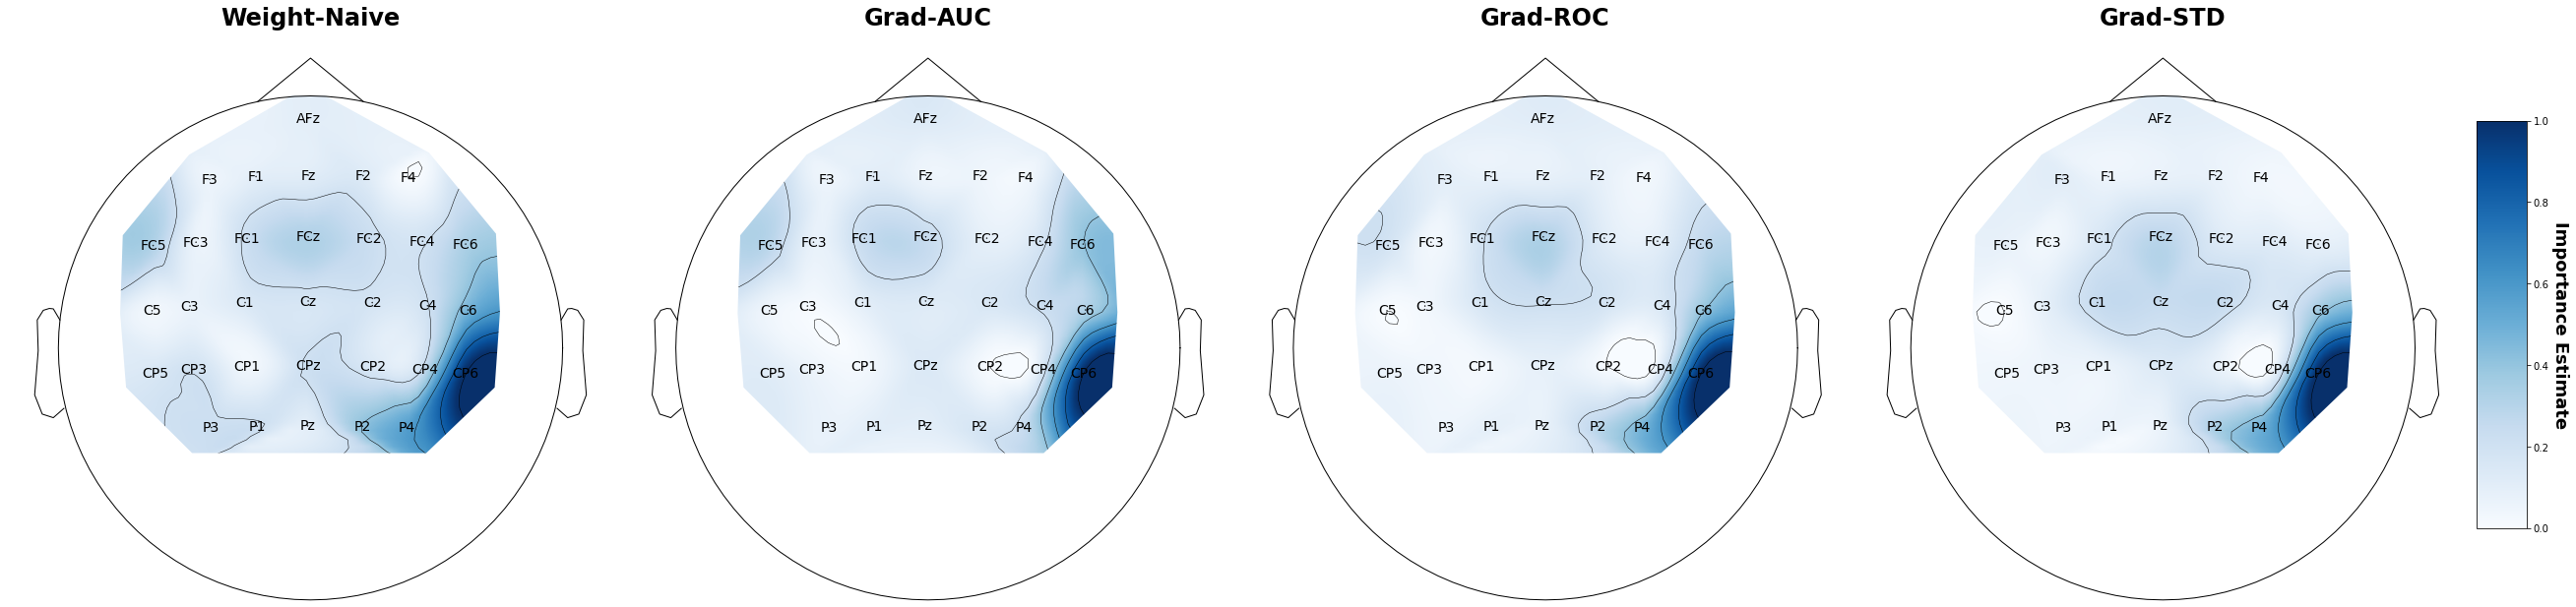

In [70]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import matplotlib
import mne
import matplotlib.pyplot as plt
# Creating MNE-Python data structures from scratch
# MNE working with sensor locations -- about montages and layouts
info= mne.create_info(channel_names, sfreq=500, ch_types=32*["eeg"])
info.set_montage("standard_1020")

fig, ax= plt.subplots(1,4, figsize=(35,25), sharex=True,sharey=True)
# fig.set_figheight(25)
# fig.set_figwidth(25)

scaler= MinMaxScaler()
scaled= scaler.fit_transform(
    np.array(w_list).mean(0).reshape(-1,1)
).reshape(-1)
#     scaled_avg_grad= avg_grad[i].sum(1)

minmax_im, _= mne.viz.plot_topomap(
    scaled,
    info,
    ch_type= "eeg",
    sensors=True,
    names=channel_names,
    cmap="Blues",
    axes=ax[0],
    show=False,
    extrapolate="local",
    #,vlim=(0,1)
#     size=50
)
ax[0].set_title("Weight-Naive", fontweight="bold", fontsize=24)

g_list={}
#     avg_grad={
#         "Grad-AUC":np.array(participant_grad["AUC"]).mean(0),
#         "Grad-ROC":np.array(participant_grad["ROC"]).mean(0),
#         "Grad-STD":np.array(participant_grad["STD"]).mean(0)
#     }
for key in avg_grad.keys():
    g_list[key]=[]
    
for dictionary in grad_list:
    for method, hp in dictionary.items():
        ahp= hp
        scaler= MinMaxScaler()
        ahp= scaler.fit_transform(ahp.reshape(-1,1)).reshape(-1)
        g_list[method].append(ahp)
        
        
for i, value in enumerate(g_list.values()):
    scaler= MinMaxScaler()
    scaled= scaler.fit_transform(
        np.array(value).mean(0).reshape(-1,1)
    ).reshape(-1)
#     scaled=np.array(value).mean(0)
    #     scaled_avg_grad= avg_grad[i].sum(1)

    minmax_im, _= mne.viz.plot_topomap(
        scaled,
        info,
        ch_type= "eeg",
        sensors=True,
        names=channel_names,
        cmap="Blues",
        axes=ax[i+1],
        show=False,
        extrapolate="local",
        #,vlim=(0,1)
        size=10
)
    ax[i+1].set_title(list(avg_grad.keys())[i], fontweight="bold", fontsize=24)

# cbar_ax= fig.add_axes([.92,0.436, 0.02,0.18])
cbar_ax= fig.add_axes([1.,0.38, 0.02,0.23])
clb= fig.colorbar(minmax_im, cax=cbar_ax)
clb.set_label("Importance Estimate", rotation=270,labelpad=20, fontsize=18, fontweight="bold")


for tt in plt.findobj(fig, matplotlib.text.Text):
    if tt.get_text() in channel_names:
        tt.set_fontsize(14)
plt.tight_layout()
plt.savefig("/home/jchan/Downloads/sample.png")

### Multivariate

In [56]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from Models.AR_EEG_models import *

w_list=[]
n_epochs=300
for r in range(5):
    saved_dir= f"./EEG/saved_models/Userfold/run{r}"
    participants_w_list=[]
    for i in range(len(participants)):

        w= pickle.load(
            open(f"{saved_dir}/Userfold-{participants[i]}-LSTM_EEGNet-Weight_Multivariate-w-e{n_epochs}.pkl", "rb") 
                        )  
        participants_w_list.append(w)
    
    avg_w= np.array(participants_w_list).mean(axis=0)
    w_list.append(avg_w)

grad_list=[]
for r in range(5):
    saved_dir= f"./EEG/saved_models/Userfold/run{r}"
    participant_grad={"AUC":[],"ROC":[],"STD":[]}
    for i in range(len(participants)):
        g= pickle.load(
                open(
                    os.path.join(
                        saved_dir, f"Userfold-{participants[i]}-LSTM_EEGNet-Grad_Multivariate-grad_all-e{n_epochs}.pkl"
                    ),"rb"
                )
        )

        participant_grad["AUC"].append(
            pd.DataFrame(
                Grad_AUC_with_multivar_grad(
                    g, n_epochs, np.zeros(input_dim), x_shape=0, scaling=True
                )
            ).to_numpy()
        )
        participant_grad["ROC"].append(
              pd.DataFrame(
                Grad_ROC_with_multivar_grad(
                    g, n_epochs, np.zeros(input_dim), x_shape=0, scaling=True
                                           )
              ).to_numpy()
        )
        participant_grad["STD"].append(
            pd.DataFrame(
                Grad_STD_with_multivar_grad(
                    g, n_epochs, np.zeros(input_dim), x_shape=0, scaling=True
                                           )
            ).to_numpy()
        )

    avg_grad={
        "Grad-AUC":np.array(participant_grad["AUC"]).mean(0),
        "Grad-ROC":np.array(participant_grad["ROC"]).mean(0),
        "Grad-STD":np.array(participant_grad["STD"]).mean(0)
    }
    grad_list.append(avg_grad)


In [79]:
df_list=[]
for i, array in enumerate(w_list):
    ahp= array.sum(0)
    scaler= MinMaxScaler()
    ahp= scaler.fit_transform(ahp.reshape(-1,1)).reshape(-1)
    for j in range(len(timestep_labels)):
        df_list.append({
            "Methods":"Weight-Naive",
            "Timestep":timestep_labels[j],
            "Normalised Importance Estimate":ahp[j],
            "Run":i
        })
        
for i, dictionary in enumerate(grad_list):
    for method, hp in dictionary.items():
        ahp= hp.sum(0)
        scaler= MinMaxScaler()
        ahp= scaler.fit_transform(ahp.reshape(-1,1)).reshape(-1)
        for j in range(len(timestep_labels)):
            df_list.append({
                "Methods":method,
                "Timestep":timestep_labels[j],
                "Normalised Importance Estimate":ahp[j],
                "Run":i
            })    

In [61]:
pd.DataFrame(df_list)

,Method,Timesteps,Value,Run
0,Weight-Naive,-0.500,0.420450,0
1,Weight-Naive,-0.492,0.426226,0
2,Weight-Naive,-0.484,0.420633,0
3,Weight-Naive,-0.476,0.416662,0
4,Weight-Naive,-0.468,0.386305,0
...,...,...,...,...
3755,STD,0.968,0.056214,4
3756,STD,0.976,0.040859,4
3757,STD,0.984,0.026739,4
3758,STD,0.992,0.015246,4


Text(0.5, 1.0, 'Relative Importance Estimate for Timesteps')

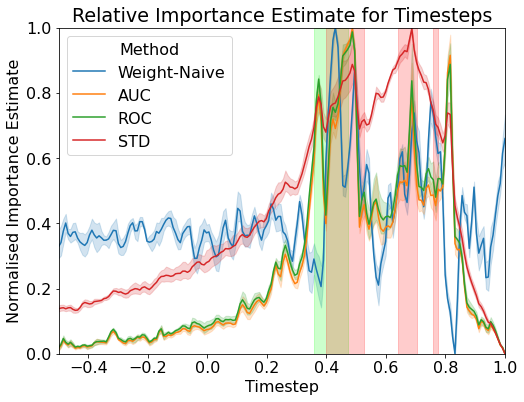

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(8,6))
matplotlib.rcParams.update({"font.size":16})
sns.lineplot(data=pd.DataFrame(df_list),
             x="Timestep",y="Normalised Importance Estimate", 
             hue="Methods")
plt.axvspan(0.358,0.471, color="lime", alpha=0.2)
plt.axvspan(0.398,0.527, color="red", alpha=0.2)
plt.axvspan(0.639,0.703, color="red", alpha=0.2)
plt.axvspan(0.759,0.775, color="red", alpha=0.2)
plt.margins(x=0, y=0)
plt.title("Relative Importance Estimate for Timesteps")


/home/jchan/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


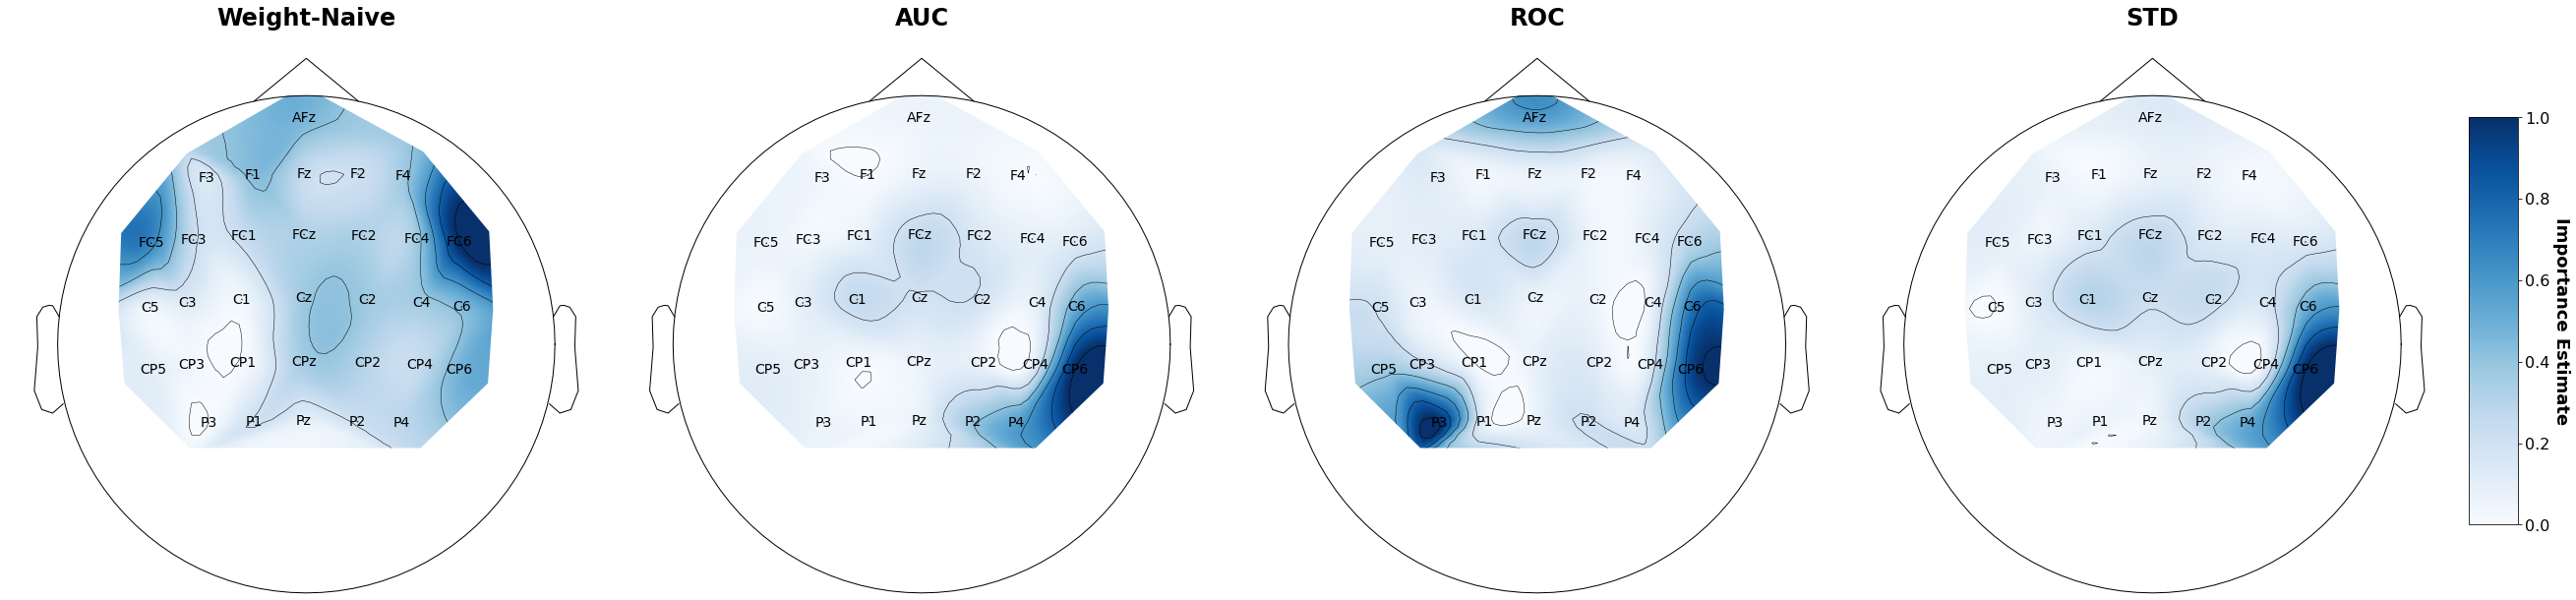

In [175]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import matplotlib
import mne
# Creating MNE-Python data structures from scratch
# MNE working with sensor locations -- about montages and layouts
info= mne.create_info(channel_names, sfreq=500, ch_types=32*["eeg"])
info.set_montage("standard_1020")

fig, ax= plt.subplots(1,4, figsize=(35,25), sharex=True,sharey=True)
# fig.set_figheight(25)
# fig.set_figwidth(25)

scaler= MinMaxScaler()
scaled= scaler.fit_transform(
    np.array(w_list).mean(0).sum(1).reshape(-1,1)
).reshape(-1)
#     scaled_avg_grad= avg_grad[i].sum(1)

minmax_im, _= mne.viz.plot_topomap(
    scaled,
    info,
    ch_type= "eeg",
    sensors=True,
    names=channel_names,
    cmap="Blues",
    axes=ax[0],
    show=False,
    extrapolate="local",
    #,vlim=(0,1)
#     size=50
)
ax[0].set_title("Weight-Naive", fontweight="bold", fontsize=24)

g_list={}
#     avg_grad={
#         "Grad-AUC":np.array(participant_grad["AUC"]).mean(0),
#         "Grad-ROC":np.array(participant_grad["ROC"]).mean(0),
#         "Grad-STD":np.array(participant_grad["STD"]).mean(0)
#     }
for key in avg_grad.keys():
    g_list[key]=[]
    
for dictionary in grad_list:
    for method, hp in dictionary.items():
        ahp= hp.sum(1)
        scaler= MinMaxScaler()
        ahp= scaler.fit_transform(ahp.reshape(-1,1)).reshape(-1)
        g_list[method].append(ahp)
        
        
for i, value in enumerate(g_list.values()):
    scaler= MinMaxScaler()
    scaled= scaler.fit_transform(
        np.array(value).mean(0).reshape(-1,1)
    ).reshape(-1)
    #     scaled_avg_grad= avg_grad[i].sum(1)

    minmax_im, _= mne.viz.plot_topomap(
        scaled,
        info,
        ch_type= "eeg",
        sensors=True,
        names=channel_names,
        cmap="Blues",
        axes=ax[i+1],
        show=False,
        extrapolate="local",
        #,vlim=(0,1)
        size=10
)
    ax[i+1].set_title(list(avg_grad.keys())[i], fontweight="bold", fontsize=24)

# cbar_ax= fig.add_axes([.92,0.436, 0.02,0.18])
cbar_ax= fig.add_axes([1.,0.38, 0.02,0.23])
clb= fig.colorbar(minmax_im, cax=cbar_ax)
clb.set_label("Importance Estimate", rotation=270,labelpad=20, fontsize=18, fontweight="bold")


for tt in plt.findobj(fig, matplotlib.text.Text):
    if tt.get_text() in channel_names:
        tt.set_fontsize(14)
plt.tight_layout()
plt.savefig("/home/jchan/Downloads/sample.png")

In [173]:
# import mne

# _=mne.channels.make_standard_montage("standard_1020")
# _.get_positions()

In [174]:
# _=mne.channels.make_standard_montage("standard_1020").plot(sphere=0.11)